# Mass dashpot spring

## Free oscillations

In [1]:
using StructuralDynamicsODESolvers, Plots, LinearAlgebra

k  = 2 ; m  = .5 ;  c = 0 ;
u0 = 1 ; v0 = 0 ;

M = m * ones(1, 1)
C = c * ones(1, 1)
K = k * ones(1, 1)
R = zeros(1)

sys = SecondOrderAffineContinuousSystem(M, C, K, R)

U₀ = u0 * ones(1); V₀ = v0 * ones(1);

ivp_free = InitialValueProblem(sys, (U₀, V₀))

NSTEPS = 500 ;
Δt = 0.05 ;

In [2]:
alg = Bathe(Δt = Δt )
sol = solve(ivp_free, alg, NSTEPS=NSTEPS);

The following command is the same as `plot(times(sol), displacements(sol, 1))`.

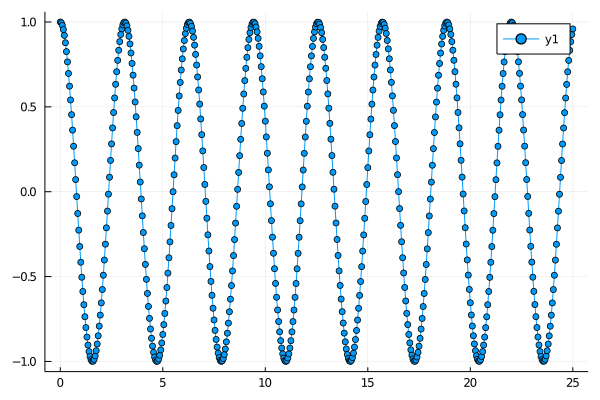

In [3]:
plot(sol, vars=(0, 1))

## Forced oscillations

### Problem definition
Let us consider now a forcing term $ f(t) = A_f \sin(ω_f . t) $

In [4]:
ωN = sqrt(k/m)
ωf = ωN * 2
Af = 10.0
R  = [ [ Af * sin(ωf * Δt * (i-1) ) ] for i in 1:NSTEPS+1];

### Second order problem resolution

In [5]:
X   = nothing # state constraints are ignored
B   = ones(1, 1)
sys = SecondOrderConstrainedLinearControlContinuousSystem(M, C, K, B, X, R)

ivp_forced_secOrder = InitialValueProblem(sys, (U₀, V₀))

alg = Bathe(Δt = Δt )
sol_secOrder = solve(ivp_forced_secOrder, alg, NSTEPS=NSTEPS);

### First order homogeneization formulation
The problem can be re-formulated as a first order and homogeneous one given by


$$
\left\{
\begin{array}{l}
\dot{u} = v \\
\dot{v} = -\omega_N^2 u + u_f/m \\
\dot{u_f} = v_f \\
\dot{v_f} = -\omega_f^2 u_f
\end{array}
\right.
$$
The new vector of variables is

$$
\textbf{x} = [ u, v, u_f, v_f ]^T
$$

In [6]:
K = [     0 1     0 0 ;
      -ωN^2 0     1/m 0 ;
          0 0     0 1 ;
          0 0 -ωf^2 0 ] ;

C = -Diagonal(ones(4))
M = zeros(4,4)
R = zeros(4)

sys = SecondOrderAffineContinuousSystem(M, C, K, R)

U₀ = [u0; v0; 0; ωf*Af ] ;

ivp_forced_firOrder = InitialValueProblem(sys, (U₀, U₀) )

alg = BackwardEuler(Δt = Δt )
sol_firOrder = solve(ivp_forced_firOrder, alg, NSTEPS=NSTEPS);

The solution obtained is

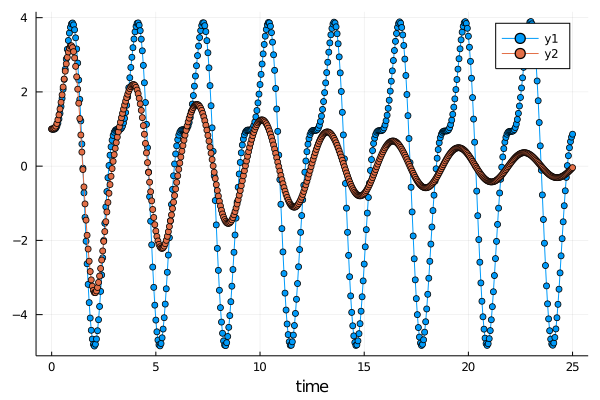

In [7]:
plot(sol_secOrder, vars=(0, 1), xlab="time" )
plot!(sol_firOrder, vars=(0, 1), xlab="time" )